In [106]:
import pandas as pd
import re
import spacy


In [107]:
df = pd.read_csv("final_dataset.csv")
df.head(10)

def preprocess(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters except alphanumeric and space
        text = re.sub(r'[^\w\s\']', ' ', text)
        # Replace multiple spaces or newlines with a single space
        text = re.sub(r'[ \n]+', ' ', text)
        return text.strip().lower()  # Strip leading/trailing whitespace and convert to lower case
    else:
        # Handle non-string inputs, here we simply return an empty string
        return ''
# Apply preprocessing to the 'Text' column
df.Text = df.Text.map(preprocess)

In [108]:
df = df.sample(frac=1).reset_index(drop=True)

In [109]:
df.head(10)

,Text,Lable
0,can we have the menu please,menu_request
1,can you please cancel my dinner plans for tonight,cancel reservation
2,remove pepsi bottle from my order,remove order
3,look into the current status of my order,check order
4,hi hope you're well,welcome
5,good day hope you're having a blast,welcome
6,can i get three more of french fries plate wit...,add order
7,hey nurse how's the patient,welcome
8,can you please help me adjust my reservation,Edit_Reservation
9,help me get a new meal order underway,new order


In [110]:
elements = [
    "Cheese Burger Sandwich",
    "Shawarma Chicken Sandwich",
    "Shawarma Meat Sandwich",
    "Falafel Sandwich",
    "Crespi Chicken Sandwich",
    "Zinger Chicken Sandwich",
    "Pepperoni Pizza",
    "Mixed Pizza",
    "Hot Dog Pizza",
    "Four Seasons Pizza",
    "Hummus Plate",
    "French Fries Plate",
    "Vegetables Soup",
    "Strawberry Donut",
    "Vanilla Donut",
    "Chocolate Donut",
    "Chocolate Waffle",
    "Pan Cake",
    "Pepsi Can",
    "Pepsi Cup",
    "Pepsi Bottle",
    "Fresh Strawberry Juice"
]


In [111]:
elements_lower = [element.lower() for element in elements]

def replace_with_food(text):
    if text is None or pd.isna(text):
        return text  # Return the original text if it's None or NaN
    pattern = "|".join(map(re.escape, elements_lower))
    modified_text = re.sub(pattern, 'food', text)
    return modified_text  

In [112]:
df.head(100)

,Text,Lable
0,can we have the menu please,menu_request
1,can you please cancel my dinner plans for tonight,cancel reservation
2,remove pepsi bottle from my order,remove order
3,look into the current status of my order,check order
4,hi hope you're well,welcome
...,...,...
95,i've never been treated so bad,Review
96,reserving a spot for eight at one am,add reservation
97,can you take out the zinger chicken sandwich,remove order
98,could you cancel my saturday dinner booking fo...,cancel reservation


In [113]:
df['Text'] = df['Text'].map(replace_with_food)

In [114]:
df.head(100)

,Text,Lable
0,can we have the menu please,menu_request
1,can you please cancel my dinner plans for tonight,cancel reservation
2,remove food from my order,remove order
3,look into the current status of my order,check order
4,hi hope you're well,welcome
...,...,...
95,i've never been treated so bad,Review
96,reserving a spot for eight at one am,add reservation
97,can you take out the food,remove order
98,could you cancel my saturday dinner booking fo...,cancel reservation


In [115]:
replace_with_food("substitute the hot dog pizza with four seasons pizza")

'substitute the food with food'

In [116]:
df.Lable.value_counts()

Lable
Review                 996
check order            679
new order              480
add reservation        443
menu_request           435
remove order           415
welcome                413
add order              411
complete order         408
Edit_Reservation       391
edit order             322
cancel reservation     260
cancel reservation     187
Name: count, dtype: int64

In [117]:
def lemmatize_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    # Join the lemmas into a single string with spaces between each lemma
    lemmas_string = ' '.join(lemmas)
    print(lemmas_string)
    return lemmas_string


In [118]:
def remove_space(text):
    if isinstance(text, str):
        text = re.sub(' +','_',text)
        return text
    else:
        return ''

df.Lable = df.Lable.map(remove_space)
df.head(10)

,Text,Lable
0,can we have the menu please,menu_request
1,can you please cancel my dinner plans for tonight,cancel_reservation
2,remove food from my order,remove_order
3,look into the current status of my order,check_order
4,hi hope you're well,welcome
5,good day hope you're having a blast,welcome
6,can i get three more of food with a side of tw...,add_order
7,hey nurse how's the patient,welcome
8,can you please help me adjust my reservation,Edit_Reservation
9,help me get a new meal order underway,new_order


In [119]:
df.Lable = '__label__' + df.Lable.astype(str)
df['Text_Label'] = df.Lable +" "+ df['Text']
df.head(100)

,Text,Lable,Text_Label
0,can we have the menu please,__label__menu_request,__label__menu_request can we have the menu please
1,can you please cancel my dinner plans for tonight,__label__cancel_reservation,__label__cancel_reservation can you please can...
2,remove food from my order,__label__remove_order,__label__remove_order remove food from my order
3,look into the current status of my order,__label__check_order,__label__check_order look into the current sta...
4,hi hope you're well,__label__welcome,__label__welcome hi hope you're well
...,...,...,...
95,i've never been treated so bad,__label__Review,__label__Review i've never been treated so bad
96,reserving a spot for eight at one am,__label__add_reservation,__label__add_reservation reserving a spot for ...
97,can you take out the food,__label__remove_order,__label__remove_order can you take out the food
98,could you cancel my saturday dinner booking fo...,__label__cancel_reservation_,__label__cancel_reservation_ could you cancel ...


In [120]:
df.Text = df.Text.map(lemmatize_text)

can we have the menu please
can you please cancel my dinner plan for tonight
remove food from my order
look into the current status of my order
hi hope you be well
good day hope you be have a blast
can I get three more of food with a side of two food
hey nurse how be the patient
can you please help I adjust my reservation
help I get a new meal order underway
I need to cancel my evening booking for next monday
do you have some brand new meal
we need the menu bring here right away
I d like to push my reservation to a later time
make my final meal selection
finish my meal selection
I need to cancel my reservation for friday brunch
pick what I need
can you assist with a new meal setup
I need to annul my brunch reservation for tomorrow morning
I d like to change my soup to a vegitable soup and add a food
I also have to taste my mom 's multi grain pumpkin pancake with pecan butter and they be amazing fluffy and delicious
check if my order have be process
please cancel my tuesday dinner table

In [121]:
df['Text_Label1'] = df.Lable +" "+ df['Text']
df.head(100)

,Text,Lable,Text_Label,Text_Label1
0,can we have the menu please,__label__menu_request,__label__menu_request can we have the menu please,__label__menu_request can we have the menu please
1,can you please cancel my dinner plan for tonight,__label__cancel_reservation,__label__cancel_reservation can you please can...,__label__cancel_reservation can you please can...
2,remove food from my order,__label__remove_order,__label__remove_order remove food from my order,__label__remove_order remove food from my order
3,look into the current status of my order,__label__check_order,__label__check_order look into the current sta...,__label__check_order look into the current sta...
4,hi hope you be well,__label__welcome,__label__welcome hi hope you're well,__label__welcome hi hope you be well
...,...,...,...,...
95,I have never be treat so bad,__label__Review,__label__Review i've never been treated so bad,__label__Review I have never be treat so bad
96,reserve a spot for eight at one am,__label__add_reservation,__label__add_reservation reserving a spot for ...,__label__add_reservation reserve a spot for ei...
97,can you take out the food,__label__remove_order,__label__remove_order can you take out the food,__label__remove_order can you take out the food
98,could you cancel my saturday dinner booking fo...,__label__cancel_reservation_,__label__cancel_reservation_ could you cancel ...,__label__cancel_reservation_ could you cancel ...


In [122]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [123]:
train.shape

(4672, 4)

In [124]:
train.to_csv("train4.train",columns=["Text_Label1"],index=False,header=False)
test.to_csv("test4.test",columns=["Text_Label1"],index=False,header=False)

In [125]:
import fasttext
model = fasttext.train_supervised(input="train3.train")
model.test("test3.test")

(1131, 0.9345711759504863, 0.9345711759504863)

In [129]:
model.save_model("final_model.bin")

In [66]:
model.predict("i need to check my order please")

(('__label__check_order',), array([0.9267984]))

In [22]:
model.predict("the pizza tastes bad and the service is horrible")

(('__label__Review',), array([0.99926931]))

In [87]:
model.predict("can I check my order")

(('__label__check_order',), array([1.00001001]))

In [24]:
model.predict("give me the menu please")

(('__label__menu_request',), array([0.86346841]))

In [25]:
model.predict("Could you update my reservation ?")

(('__label__Edit_Reservation',), array([0.97792423]))

In [26]:

test = model.test("test1.test")
print(test)

(736, 0.9524456521739131, 0.9524456521739131)


In [75]:
model.predict("helllo")

(('__label__',), array([1.00001001]))

In [28]:
model.predict("Give me 2 plates of food, one food")

(('__label__add_order',), array([0.98795843]))

In [29]:
model.predict("Can you remove the food and add a food?")


(('__label__edit_order',), array([0.52600795]))

In [30]:
model.predict("Can you remove the Shawarma Meat Sandwich and add a Shawarma Chicken Sandwich?")

(('__label__Review',), array([0.98549557]))

In [67]:
df.Lable.value_counts()

Lable
__label__Review                 996
__label__check_order            679
__label__new_order              480
__label__add_reservation        443
__label__menu_request           435
__label__remove_order           415
__label__welcome                413
__label__add_order              411
__label__complete_order         408
__label__Edit_Reservation       391
__label__edit_order             322
__label__cancel_reservation     260
__label__cancel_reservation_    187
__label__                         1
Name: count, dtype: int64

In [68]:
lrs = [0.01,0.02,0.03,0.1,0.2,0.3,0.9]
# losses = ["softmax", "hs", "hierarchical", "ns", "kullback-leibler"]
epochs = [10,20,50,100,200,500,1000,1500,2000]
verbose = True

In [74]:
import numpy as np

accuracy_scores = []
models = []
best_model_accs = [] 

best_model_acc = -np.inf
best_model = None
counter = 1

for lr in lrs:
    for epoch in epochs:
        print(f"{counter} : epoch = {epoch}, lr = {lr}")
        model = fasttext.train_supervised(input="train1.train", lr=lr, epoch=epoch, verbose=verbose)
        test = model.test("test1.test")
        print(f"Model accuracy = {test[1]}")
        accuracy_scores.append(test[1])
        best_model_accs.append(max(test[1], best_model_acc))
        
        counter += 1
        print("-------------------------------------")
        
        if test[1] > best_model_acc:
            best_model_acc = test[1]
            best_model = model


1 : epoch = 10, lr = 0.01
Model accuracy = 0.264945652173913
-------------------------------------
2 : epoch = 20, lr = 0.01
Model accuracy = 0.7663043478260869
-------------------------------------
3 : epoch = 50, lr = 0.01
Model accuracy = 0.9171195652173914
-------------------------------------
4 : epoch = 100, lr = 0.01
Model accuracy = 0.9578804347826086
-------------------------------------
5 : epoch = 200, lr = 0.01
Model accuracy = 0.9714673913043478
-------------------------------------
6 : epoch = 500, lr = 0.01
Model accuracy = 0.9809782608695652
-------------------------------------
7 : epoch = 1000, lr = 0.01
Model accuracy = 0.9796195652173914
-------------------------------------
8 : epoch = 1500, lr = 0.01
Model accuracy = 0.9796195652173914
-------------------------------------
9 : epoch = 2000, lr = 0.01
Model accuracy = 0.9796195652173914
-------------------------------------
10 : epoch = 10, lr = 0.02
Model accuracy = 0.7676630434782609
-----------------------------

In [76]:
print(best_model_acc)

0.9864130434782609


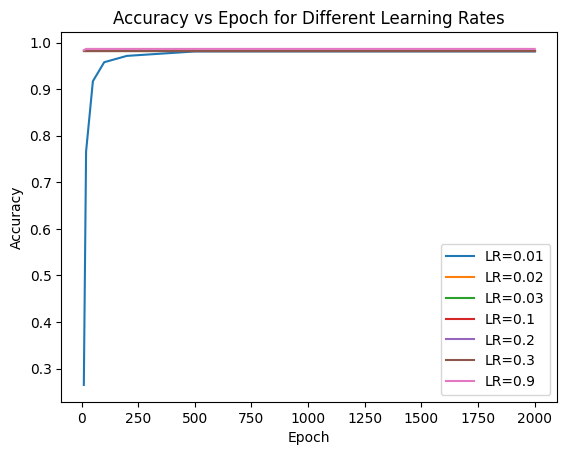

In [77]:
import matplotlib.pyplot as plt

num_epochs = len(epochs)
num_lrs = len(lrs)

fig, ax = plt.subplots()
for i, lr in enumerate(lrs):
    accuracies = []
    for j, epoch in enumerate(epochs):
        accuracies.append(best_model_accs[i * num_epochs + j])
    ax.plot(epochs, accuracies, label=f'LR={lr}')

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.title('Accuracy vs Epoch for Different Learning Rates')
plt.show()


In [78]:
best_model.predict("please can you remove the food of my order and make the food two ")

(('__label__edit_order',), array([0.58563137]))

In [79]:
best_model.predict("blablabla")

(('__label__',), array([0.96663105]))

In [80]:
best_model.predict("give me the fucking menu you peace of shit")

(('__label__menu_request',), array([0.99272776]))

In [81]:
best_model.predict("i want to order")

(('__label__new_order',), array([0.99809694]))

In [85]:
best_model.predict("check my order please")

(('__label__complete_order',), array([0.5353868]))

In [88]:
model.save_model("main_model4.bin")

In [44]:
import fasttext
model = fasttext.load_model("main_model2.bin")
model.predict("Check if there are any new updates about my order and let me know.")

(('__label__Review',), array([0.45687482]))

In [55]:
import mysql.connector

# Replace these with your actual credentials

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 'restaurant'
}

try:
    cnx = mysql.connector.connect(**db_config)
    cursor = cnx.cursor()
    access_token = "EHhyX0i8d5"
    # Example query
    query = ("SELECT name FROM users WHERE remember_token = 'EHhyX0i8d5';")
    
    cursor.execute(query)
    
    for row in cursor:
        print(row)
        
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    if cnx:
        cursor.close()
        cnx.close()

('Mr. Llewellyn Cronin Sr.',)


In [49]:
model.predict("kill me")

(('__label__complete_order',), array([0.81518567]))

In [50]:
model.predict("i'm comming at 10 am")

(('__label__new_order',), array([0.4792507]))

In [51]:
model.predict("want food 10 pieces")

(('__label__remove_order',), array([0.90306318]))